<a href="https://colab.research.google.com/github/Meshva-p/sparks-foundation/blob/main/sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***TO EXPLORE BUSINESS ANALYTICS -  TASK 5 ***

     AUTHOR  - Meshva Patel

     DATA SCIENCE AND BUSINESS ANALYTICS INTERN



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/sample data/SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Converting Postal Code to dtype as no calculations would be done on it

In [ ]:
df['Postal Code'] = df['Postal Code'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


**DATA CLEANING**

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

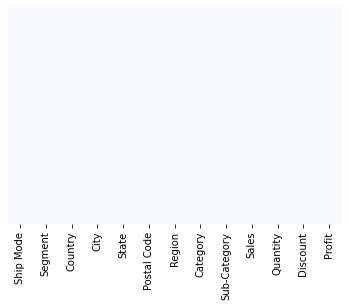

In [ ]:
# FINDING MISSING DATA 
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
df.isnull().sum()

We observe no missing data

In [ ]:
# ERADICATE DUPLICATE DATA
df.drop_duplicates(keep= 'first',inplace=True)
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


We observe that the df previously had a size of 9994 x 13 and now its size has reduced to 9977 x 13 , hence 17 rows were duplicated and removed .

# **DATA ANALYSIS AND VISUALIZATION**

In [ ]:
# TOTAL SALES AND PROFIT OF THE SUPERSTORE
tot_sales = df['Sales'].sum()
print("TOTAL SALES : ", tot_sales , "USD")
tot_profit = df['Profit'].sum()
print("TOTAL PROFIT : ", tot_profit , "USD")


TOTAL SALES :  2296195.5903 USD
TOTAL Profit :  286241.4226 USD


We observe the TOTAL SALES : 2296195.5903 USD  and TOTAL PROFIT : 286241.4226 USD 

No.of.unique states : 49
TOP 10 SALES INDEX :  Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'],
      dtype='object', name='State')


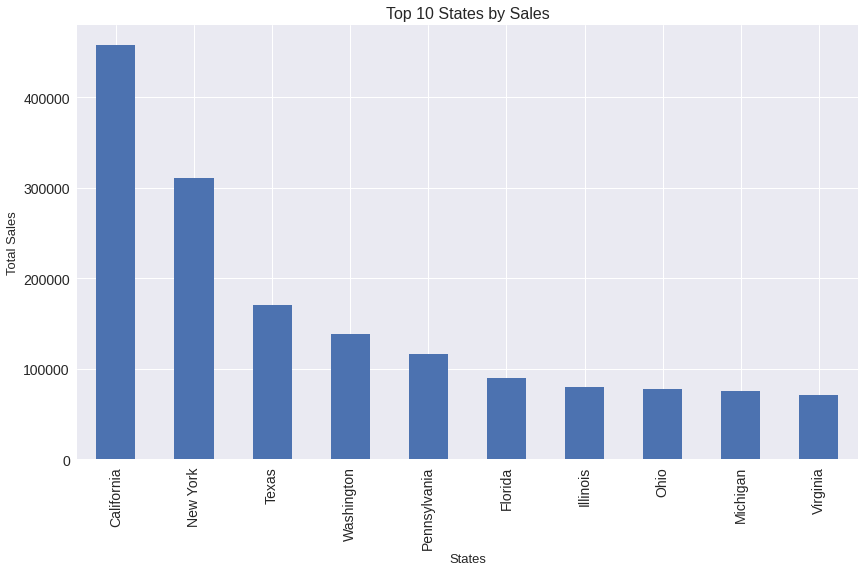

TOP 10 PROFIT INDEX :  Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')


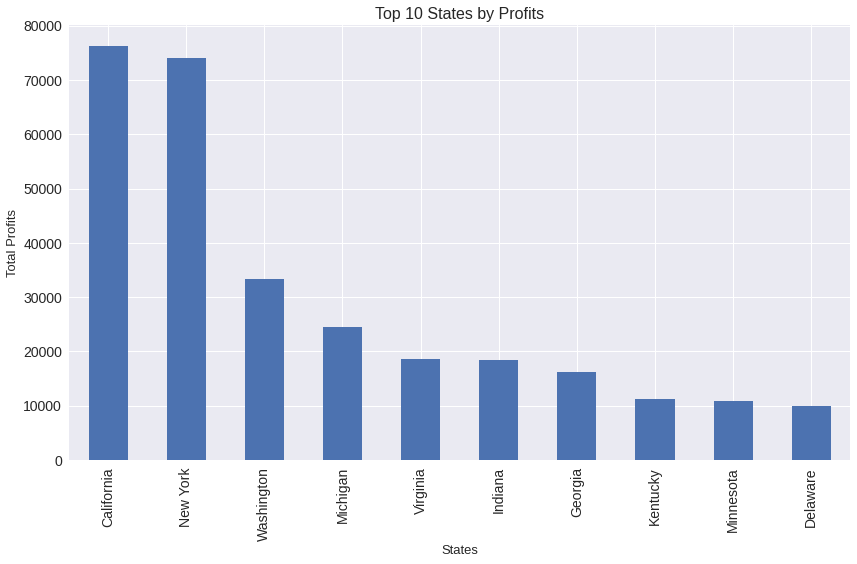

In [ ]:
# TOP 10 PERFORMING SALES AND PROFIT STATES

#calculate the number of states:
n = len(pd.unique(df['State']))   
print("No.of.unique states :",n)  # output: 49 unique states , so now let's find the top 10 sales and profit performing states  

# TOP 10 SALES 
top_sales = df.groupby("State").Sales.sum().nlargest(n =10)
print("TOP 10 SALES INDEX : ", top_sales.index)

plt.style.use('seaborn')
top_sales.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 States by Sales",fontsize =16)
plt.show()

# TOP 10 PROFIT  
top_profit = df.groupby("State").Profit.sum().nlargest(n =10)
print("TOP 10 PROFIT INDEX : ",top_profit.index)

plt.style.use('seaborn')
top_profit.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Profits",fontsize =13)
plt.title("Top 10 States by Profits",fontsize =16)
plt.show()



OBSERVATION:   

1.   TOP 10 SALES PERFORMING STATES : 'California', 'New York', 'Texas', 'Washington', 'Pennsylvania','Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'
2.   TOP 10 PROFITTING STATES : 'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'

 


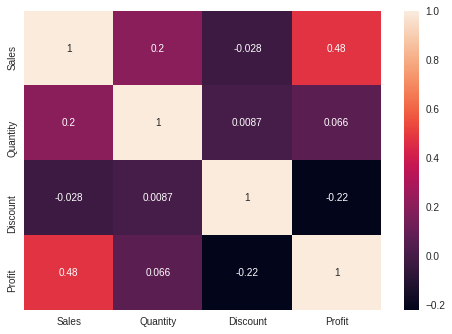

In [ ]:
# PLOTTING THE CORRELATION MATRIX 

corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

OBSERVATION: 


1.   LEAST correlation between discount and profits .
2.   MAXIMUM correlation between profit and sales.




(0.0, 20.0)

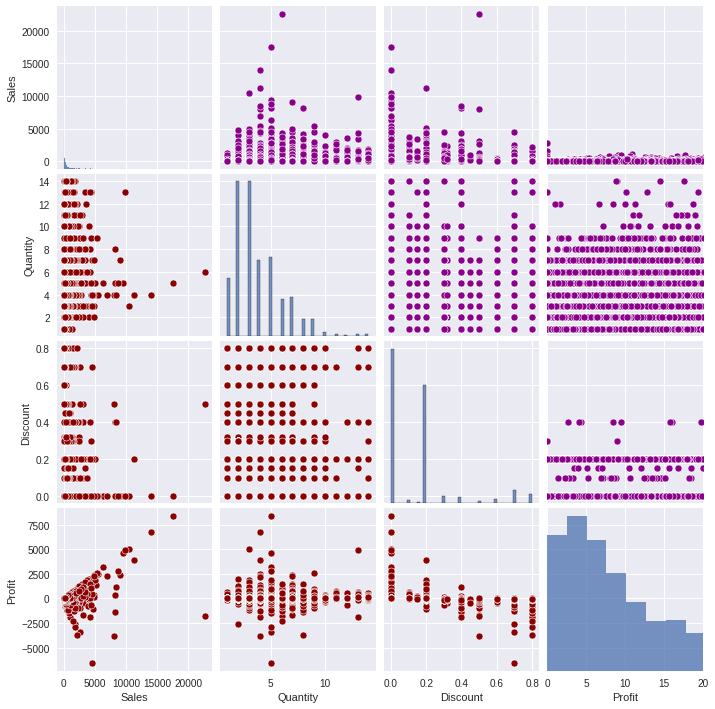

In [ ]:
all_plot=df.loc[:,['Sales','Quantity','Discount','Profit']]
g = sns.pairplot(all_plot)
g.map_upper(sns.scatterplot,color='darkmagenta')
g.map_lower(sns.scatterplot, color='darkred')
g.map_diag(plt.hist)
plt.xlim(0,20)

**VISUALIZATION WHEN DISCOUNT IS 0 AND NON 0 TO GAIN A BETTER INSIGHT OF HOW IT AFFECTS THE SALES AND PROFIT**

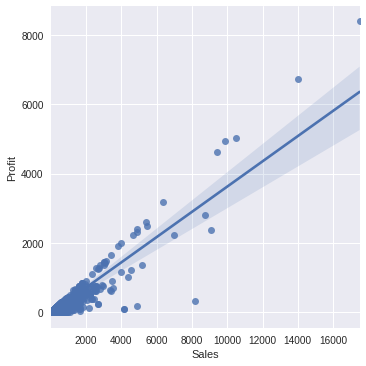

In [ ]:
# WHEN DISCOUNT IS 0 

sp_d0=df[df['Discount']==0]
sns.lmplot(x='Sales',y='Profit',data=sp_d0)


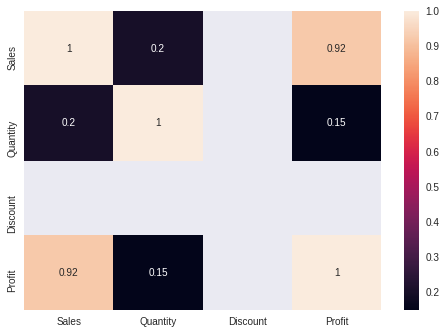

In [ ]:
#FIGURING OUT HOW STRONG THE CORRELATION BETWEEN SALES AND PROFIT IS WHEN DISCOUNT IS 0

x=sp_d0
x=data.corr()
sns.heatmap(x,xticklabels=x.columns,yticklabels=x.columns,annot=True)

OBSERVATION : There exists a positive correlation of 0.92 between Sales and Profit when Discount is 0. 

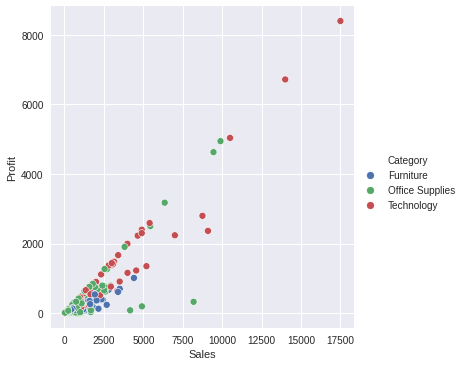

In [ ]:
# OBSERVING THE CATEGORY WISE DISTRIBUTION OF SALES AND PROFITS WHEN DISCOUNT IS 0

sns.relplot(x='Sales',y='Profit',hue='Category',data=sp_d0)

We observe that the Sales and Profit of Technology grow as the demand for it increases.

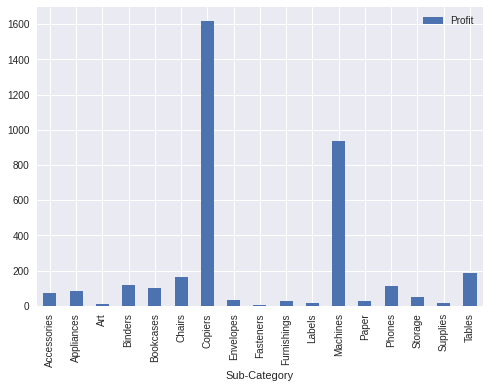

In [ ]:
# PROFIT ACCOMPANIED BY THE SALES OF THE DIFFERENT SUB - CATEGORIES , WHEN DISCOUNT IS 0

p=pd.pivot_table(sp_d0,index='Sub-Category',values='Profit')
p.plot(kind='bar')

We observe that Copiers and Machines bring out the Maximum Profit from the Sub-Categories

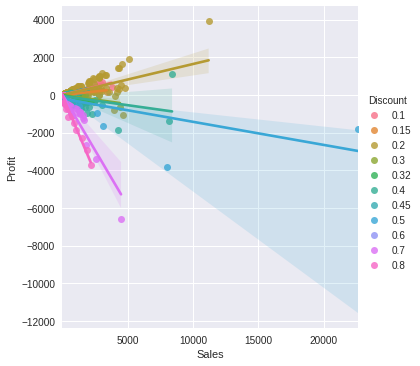

In [ ]:
# WHEN THE DISCOUNT IS NON 0

sp_d1=df[df['Discount']!=0]
sns.lmplot(x='Sales',y='Profit',hue='Discount',data=sp_d1)

We observe that when the Discount increases , Sales increases but Profit Decreases.

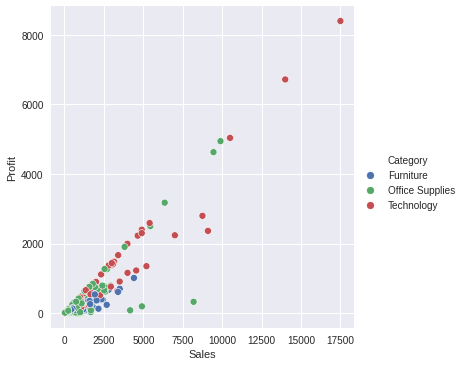

In [ ]:
# SALES AND PROFIT OF DIFFERENT CATERGORIES WHEN DISCOUNT IS NON 0

sns.relplot(x='Sales',y='Profit',hue='Category',data=sp_d1)

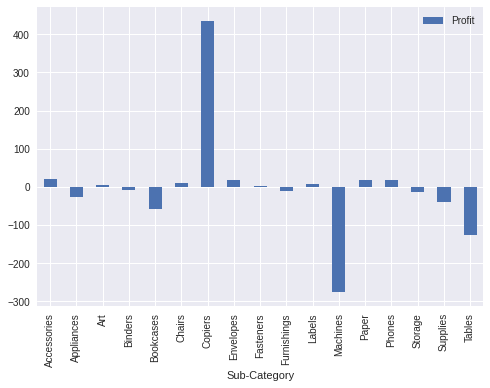

In [ ]:
# FINDING THE PROFIT BETWEEN THE SUB-CATEGORIES WHEN DISCOUNT IS NON 0

p=pd.pivot_table(sp_d1,index='Sub-Category',values='Profit')
p.plot(kind='bar')

Suprisingly , we observe that when the Discount is Non 0 , the Profit from Appliances , Bookcases, Machines(highest loss incurred) and Tables decrease. But , the Copiers stay in demand comparatively .

,Sales
Sub-Category,
Accessories,161.217132
Appliances,151.107544
Art,30.550846
Binders,102.598894
Bookcases,493.714383
Chairs,490.904764
Copiers,1588.670652
Envelopes,57.548549
Fasteners,13.499326


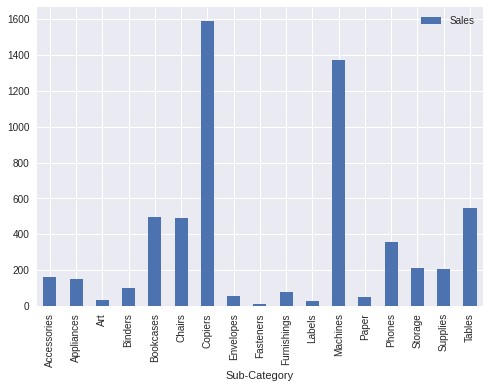

In [ ]:
# SALES IN THE SUB-CATEGORY WHEN THE DISCOUNT IS NON 0

p=pd.pivot_table(sp_d1,index='Sub-Category',values='Sales')
p.plot(kind='bar')
p.style.background_gradient(cmap='Greens')

OBSERVATION :  SALES in Sub-Categories when Discount = NON 0 


1.   Maximum for Copiers and then Machines 
2.   Tables account for third most sold items 
3.   Items sold almost at par :
     1. Bookcases and Chairs
     2. Storage and Supplies 
     3. Accessories and Appliances
4.   Fasteners(least sold of all Sub- Categories) , Art, Labels,Paper,    Envelopes are amongst the less sold items.



**Distribtion of Profit Among Different Regions and Segments** 

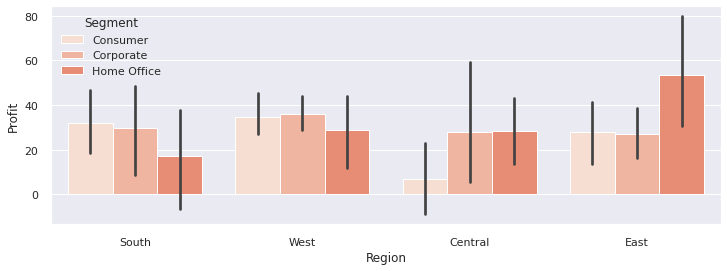

In [ ]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "Reds")
sns.barplot(data = df , x = "Region",y = "Profit" ,hue = "Segment")
plt.show()

OBSERVATION :


1.   Maximum Profit for the Home Office Segment is in the East Region and The Least Profit comes from the Central Region.
2.   Maximum Profit for the Corporate Segment is from the West Region and the Least Profit in the Central Region
3.   Maximum Profit for the Consumer Segment is from the West Region and the Least Profit in the Central Region.

Overall , Least profits are obtained from the Central Region.


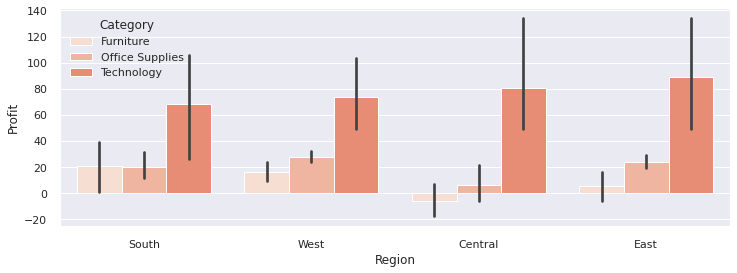

In [ ]:
# PROFIT GENERATED BY THE CATEGORIES IN DIFFERENT REGIONS

plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "Reds")
sns.barplot(data = df , x = "Region",y = "Profit" ,hue = "Category")
plt.show()

OBSERVATION : 


1.   Profit in Technology Category remains steadfast in every Region
2.   The Profit is negative only in the Furniture Category in the Central Region.



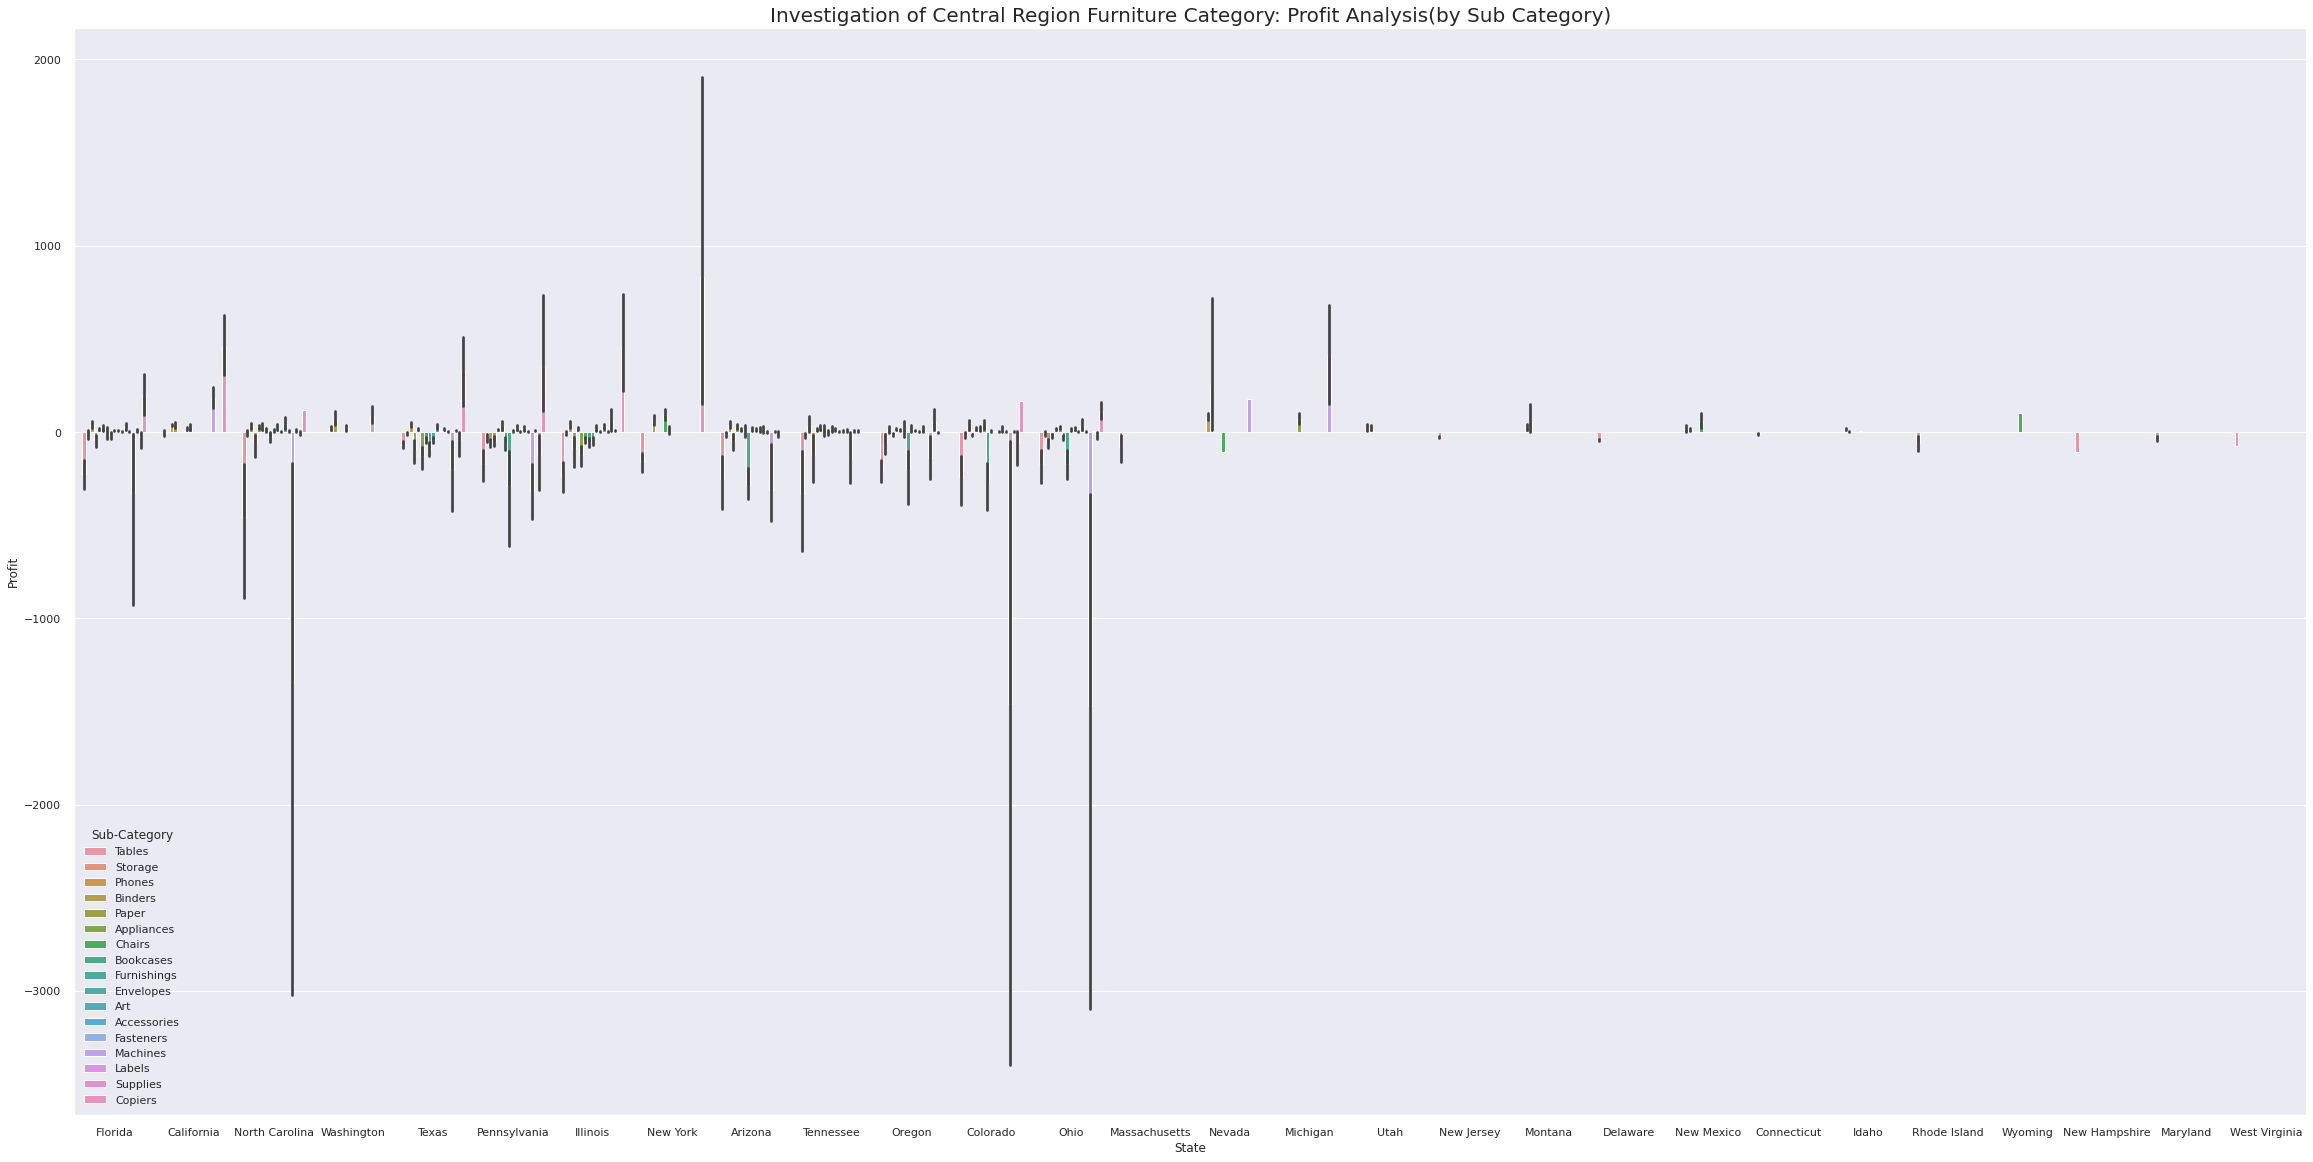

In [ ]:
#Investigation of Central Region Furniture Category: Profit Analysis(by Sub Category)

plt.figure(figsize = (40,20))
sns.set(font_scale=1, palette= "viridis")
sns.barplot( x = "State",y = "Profit" ,data = sp_d1 ,hue = "Sub-Category")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Sub Category)", fontsize = 20)
plt.show()

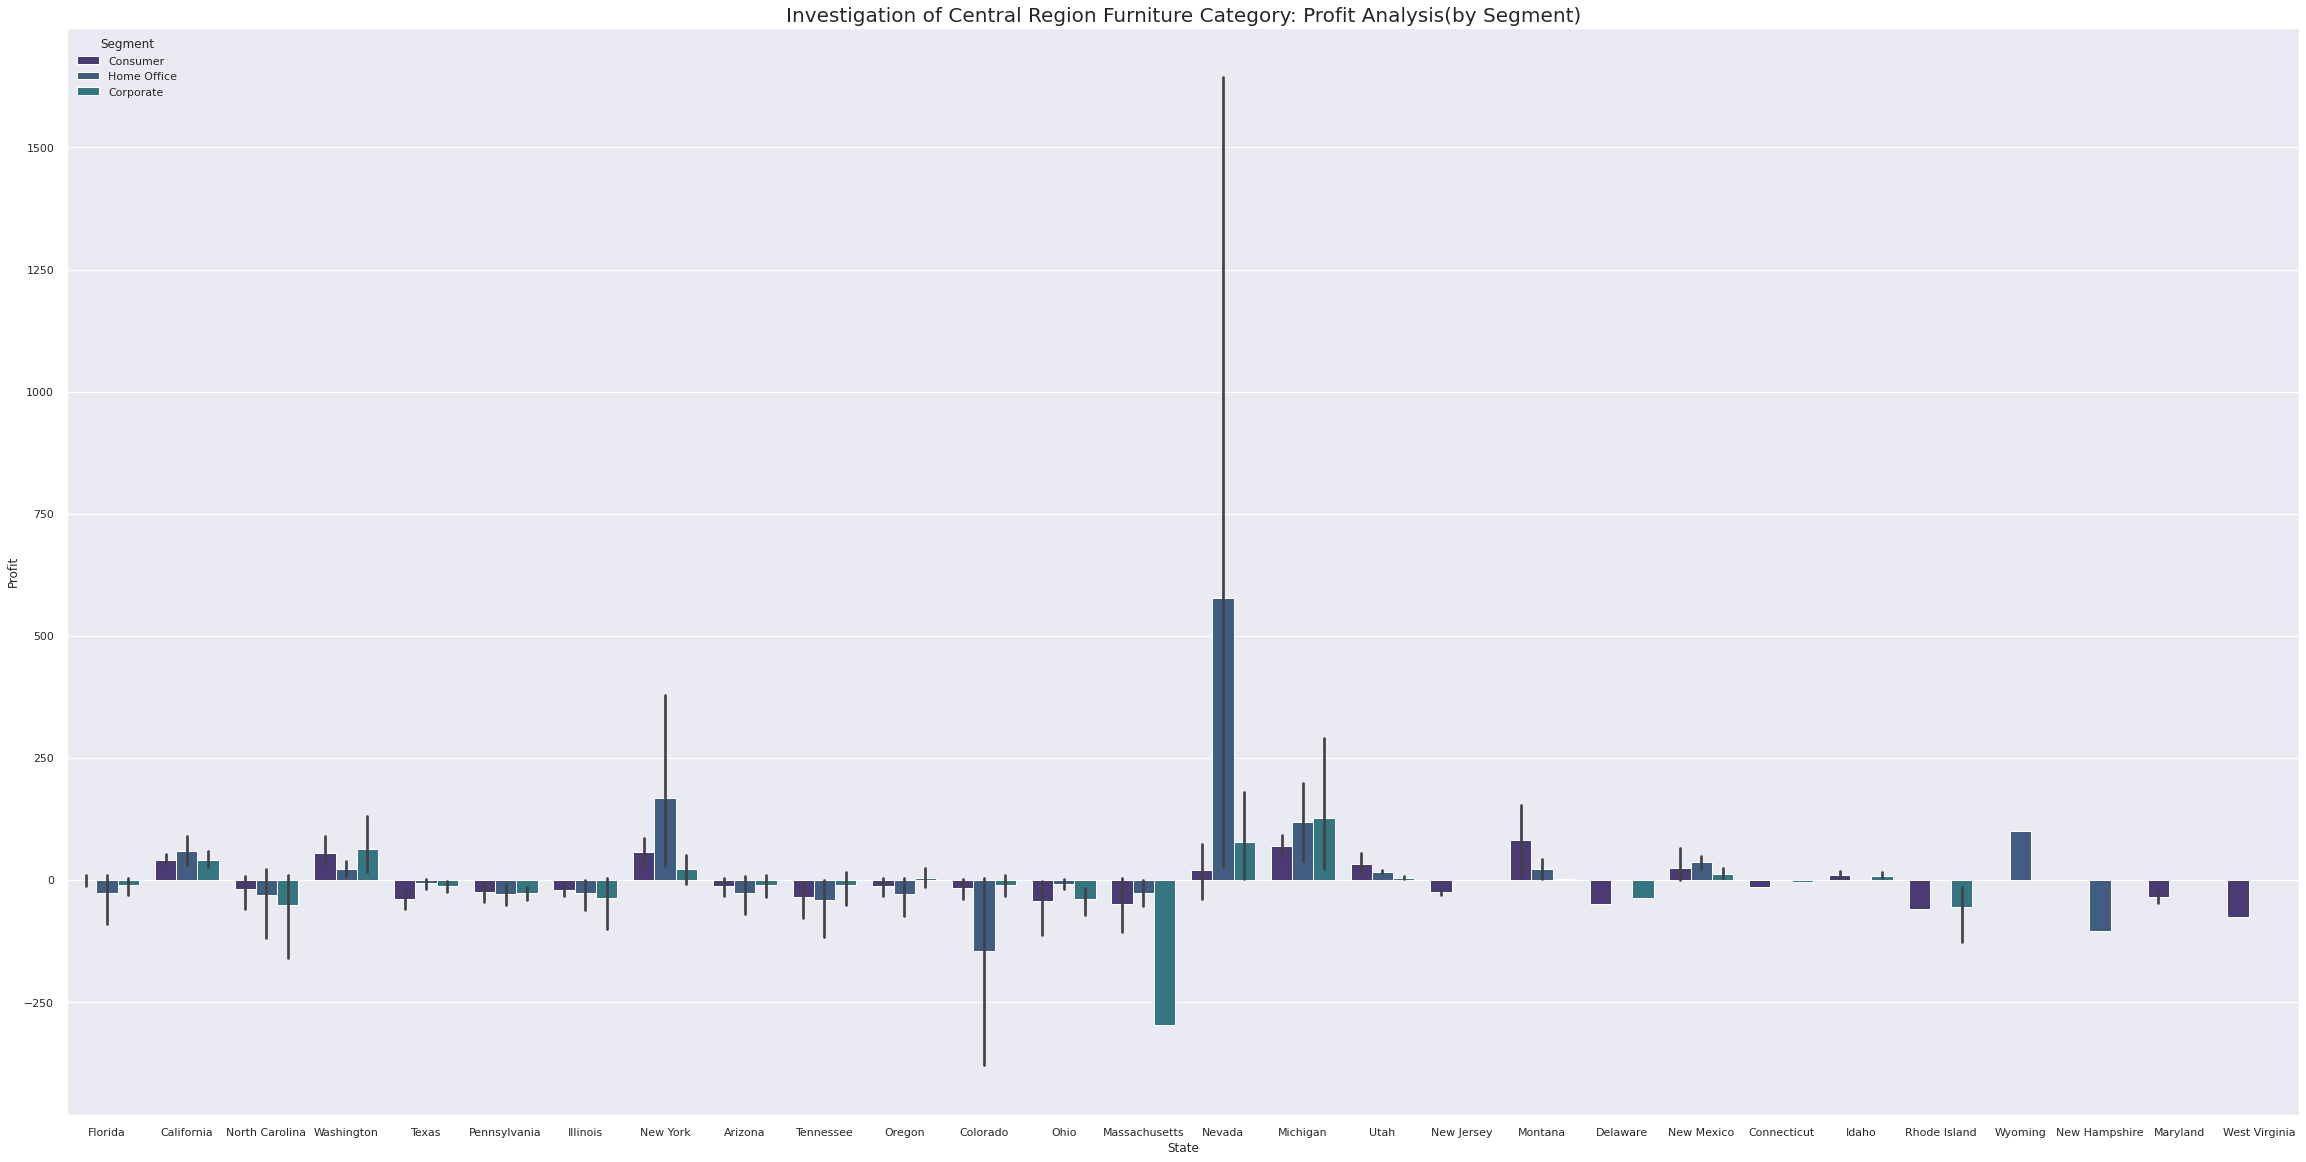

In [ ]:
# Investigation of Central Region Furniture Category: Profit Analysis(by Segment)

plt.figure(figsize = (40,20))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = sp_d1 , x = "State",y = "Profit" ,hue = "Segment")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Segment)", fontsize = 20)
plt.show()

OBSERVATION:

Texas and Illiois are only two states contributing to all the losses in 

1.   Texas and Illinois are only two states contributing to all the losses in Furniture category in the Central Region
2.   Losses in Tables Sub-Category is significanlty high.



In [ ]:
# IS THE STORE PROVIDING DISCOUNTS FOR TEXAS AND ILLINIOS

gb_Category_Furniture =list(list(sp_d1.groupby(sp_d1["Region"]))[0][1].groupby("Category"))[0][1]


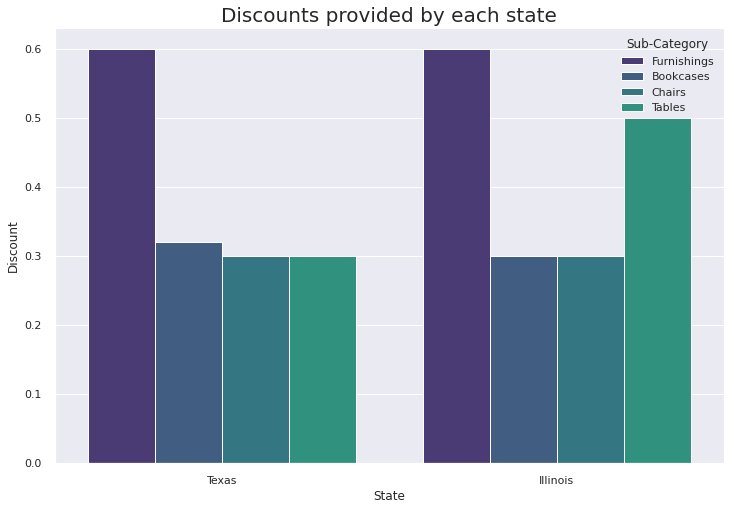

In [ ]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Discount" ,hue = "Sub-Category")
plt.title("Discounts provided by each state", fontsize = 20)
plt.show()

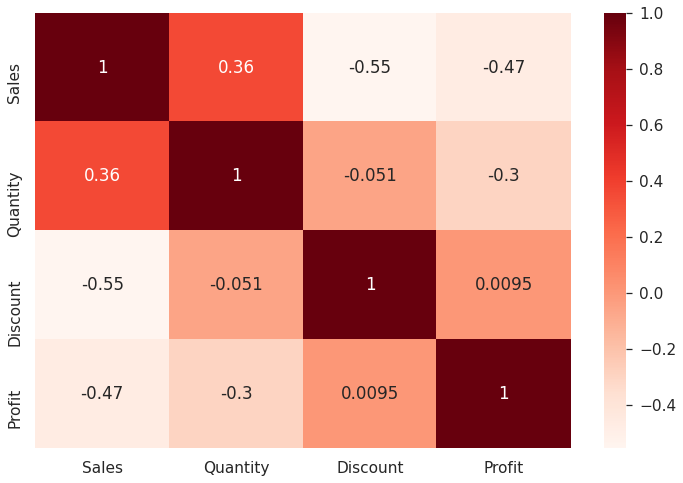

In [ ]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
sns.heatmap(gb_Category_Furniture.corr() , annot = True, cmap ="Reds")
plt.show()

OBSERVATION :

Texas and Illinois are only states providing discounts in the whole central region.
Also, these discounts are very high!
1. 60% on Furnishings
2. 30% on Bookcases and Chairs
3. 50% disount on Tables in Illinois and 30% in Texas
4. Are these discounts driving sales up?.... NO!

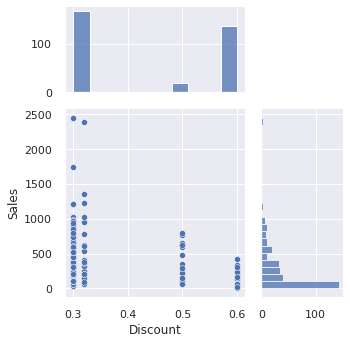

In [ ]:
# JOINT plot for studying overall relationship between Sales and Discounts
sns.set(font_scale=1)
sns.jointplot(data = gb_Category_Furniture , x = "Discount", y ="Sales", height=5, ratio=2, marginal_ticks=True)
plt.show()

Actually Sales tend to go down when discounts go up in 3 out of 4 "Subcategories" and also in overall Furniture Category Sales in the Central Region.

### **INSIGHTS FROM THESE DATA **

*   Total Sales = 2,296,195.56 USD

*   Total Profits = 286,241.42 USD

*   Top 10 States by Sales: 'California', 'New York', 'Texas', 'Washington', 'Pennsylvania','Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'

*   Top 10 States by Profit: 'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'

*   California and New York are far ahead of their competitor states in terms of Profits.

*    Discounts are triggering losses.

*    "Furniture" Category is the only loss making sector that to only in Central Region

*   Losses are inccured in Furniture Category irrespective of ship mode

*  Also, Their is negative correlation between Discount and Sales eventhough dicounts are entered as positive values...i.e. they are not helping in improving sales of "Furniture" category of the company

*   Texas and Illiois are only two states contributing to all the losses in Furniture category in the Central Region


*   Losses in Tables Sub Category is significanlty high.

*  Texas and Illinois are only states providing discounts in the whole central region 
*   Also, these discounts are crazy high!
60% on Furnishings
30% on Bookcases and Chairs
50% disount on Tables in Illinois and 30% in Texas

*   Actually Sales tend to do down when discounts go up in 3 out of 4 "Subcategories" and also in overall Furniture Category Sales in the Central Region


From All these analysis we finally **conclude** that,

1) If we give more Discount on products our sales may increase but Profit may go down as well.

2) In Technology category business we get more Profit as compared to other two other categories as less discount was awarded on it.

3) Here we also focus on our Office Supplies category business because sales of these category is less as compared to other two.

4) Also Sales in 'Fasteners','labels'and 'Art' category are so weak so we have to concentrate on these sub-category businesses.

5) We have to concentrate on the Sales of 'West Virginia' State and 'San Luis Obispo' and 'Woodland' City.

6) To rise the profits , we first need to sell consumer segment products more .

7) For enhancing the profits , we need to sell more to the states which are liking our products like NEWYORK and CALIFORNIA .


Hence To get good profit in any business you have to focus on increasing sales but not giving more discount